In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### read fruit data

In [25]:
fruits = pd.read_csv('fruit_data_with_colors.txt', sep="\t")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### fruit table info

In [26]:
fruits.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


#### dimension(row, column) of fruit table

In [27]:
fruits.shape
# fruits.shape[0]  # for row number
# fruits.shape[1]  # for column number

(59, 7)

#### No of Distinct fruits

In [28]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

#### Total no of respective fruit  

In [29]:
fruits.groupby(['fruit_name']).size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

#### Visualization

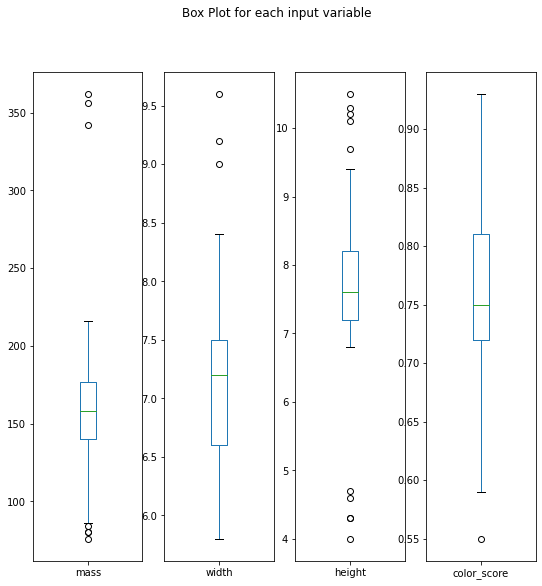

In [30]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(1,4), 
                                        sharex=False, sharey=False, figsize=(9, 9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

**Correlation** (mass and width)

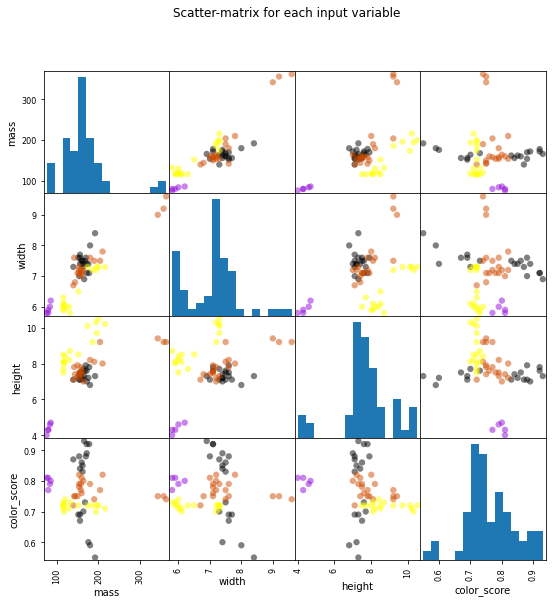

In [46]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

fruits_parameters = ['mass', 'width', 'height', 'color_score']
X = fruits[fruits_parameters]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

use **correlation formular** for mass and width 

In [42]:
cor_mass_and_width = np.corrcoef(fruits['mass'],fruits['width'])
cor_mass_and_width

array([[1.        , 0.87768738],
       [0.87768738, 1.        ]])

**Statistical Summary**

We can see that the numerical values do not have the same scale. 
We will need to apply scaling to the test set that we computed for the training set.

In [47]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


**Train and Test Sets**

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

**Scaling**

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Here is the **list** of 5 most commonly used **machine learning algorithms(Models)**. 

1. Linear Regression
2. Logistic Regression/Linear Discriminant Analysis
3. Decision Tree
4. Naive Bayes
5. kNN (k- Nearest Neighbors)
6. Random Forest
7. Artificial Neural Networks
8. Support Vector Machine

### **Build Models**

**1. Linear Regression**

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


**2. LinearDiscriminantAnalysis**

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldc = LinearDiscriminantAnalysis()
ldc.fit(X_train, y_train)
print('Accuracy of LinearDiscriminantAnalysis classifier on training set: {:.2f}'.format(ldc.score(X_train, y_train)))
print('Accuracy of LinearDiscriminantAnalysis classifier on test set: {:.2f}'.format(ldc.score(X_test, y_test))) 

Accuracy of LinearDiscriminantAnalysis classifier on training set: 0.86
Accuracy of LinearDiscriminantAnalysis classifier on test set: 0.67


**3. Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


**4. Naive Bayes**

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.86
Accuracy of GaussianNB classifier on test set: 0.67


**5. kNN (k- Nearest Neighbors)**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print('Accuracy of KNeighborsClassifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNeighborsClassifier on training set: 0.95
Accuracy of KNeighborsClassifier on test set: 1.00


**6. Random Forest** ASSIGNMENT

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print('Accuracy of RandomForestClassifier on training set: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Accuracy of RandomForestClassifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of RandomForestClassifier on training set: 1.00
Accuracy of RandomForestClassifier on test set: 0.80


**7. Artificial Neural Networks**(ASSIGNMENT)

In [59]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier()
nnc.fit(X_train, y_train)
print('Accuracy of Neural_network Classifier on training set: {:.2f}'.format(nnc.score(X_train, y_train)))
print('Accuracy of Neural_network Classifier on test set: {:.2f}'.format(nnc.score(X_test, y_test)))

Accuracy of Neural_network Classifier on training set: 0.82
Accuracy of Neural_network Classifier on test set: 0.53


/home/femi/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**8. Support Vector Machine**

In [65]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
print('Accuracy of SVC on training set: {:.2f}'.format(svc.score(X_train, y_train)))
print('Accuracy of SVC on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of SVC on training set: 0.91
Accuracy of SVC on test set: 0.80


The **KNN algorithm** was the **most** accurate model that we tried. 
The confusion matrix provides an indication of no error made on the test set. 
However, the test set was very small.

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = knn.predict(X_test)
print('confusion matrix')
print(confusion_matrix(y_test,pred))
print("........................................")

print('classification report')
print(classification_report(y_test,pred))




confusion matrix
[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
........................................
classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

